In [27]:
import numpy as np
import pandas as pd
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, precision_score, classification_report, confusion_matrix, recall_score, plot_precision_recall_curve
from sklearn.pipeline import Pipeline


In [19]:
feature_columns_catg = [
    'Source System',
    'CountryCodeOffice',
    'ML Risk Rating',
    'product_type',
    'currency_reduced',
]
feature_columns_bool = [
    'suspicious_client',
    'trusted_client',
    'new_client', 
    'frequent_client', 
    'is_month_start',
    'is_month_end',
]
feature_column_cont = [
    'month',
    'weekday',
    'quarter',
    'gbp_log_amount'
]
outcome_column = 'Flag'


In [20]:
# fetch testing data from deep storage
testing_df = pd.read_parquet('data/performance/holdout_data.parquet')

In [21]:
# load model
encoder_catg = pickle.load(open('model/encoder_catg.pckl',      'rb'))
encoder_cont = pickle.load(open('model/encoder_cont.pckl',      'rb'))
classifier   = pickle.load(open('model/random_forest_clf.pckl', 'rb'))

In [22]:
X_catg_true = encoder_catg.transform(testing_df[feature_columns_catg]).toarray()
X_cont_true = encoder_cont.transform(np.array(testing_df[feature_column_cont]))
X_true = np.concatenate([X_catg_true[:],X_cont_true[:],testing_df[feature_columns_bool]], axis=1)
y_true = testing_df[outcome_column]

In [28]:
print('recall:', recall_score(y_true, classifier.predict(X_true)))

recall 0.17647058823529413
precision 0.375


In [24]:
confusion_matrix(y_true, classifier.predict(X_true))

array([[6013,   10],
       [  28,    6]])

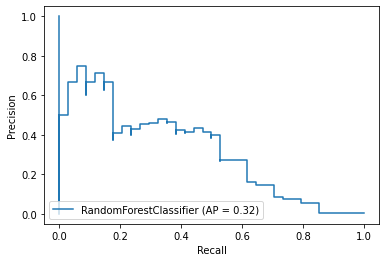

In [16]:
plot_precision_recall_curve(classifier,X_true,y_true)

In [29]:
print('precision', precision_score(y_true, classifier.predict(X_true)))

precision 0.375
